In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [24]:
edges = pd.read_csv("graph.csv")
heuristic_df = pd.read_csv("heuristic.csv")

graph = edges.groupby("from")["to"].apply(list).to_dict()
heuristic = dict(zip(heuristic_df["node"], heuristic_df["heuristic"]))
for node in heuristic:
    graph.setdefault(node, [])

start, goal = "A", "G"
path, current = [start], start

while current != goal:
    neighbors = graph[current]
    if not neighbors:
        print("Dead end at:", current); break
    nxt = min(neighbors, key=lambda n: heuristic[n])
    if heuristic[nxt] >= heuristic[current]:
        print("Stuck at local minimum at:", current); break
    current = nxt
    path.append(current)

Goal reached!
Path taken: ['A', 'B', 'E', 'G']


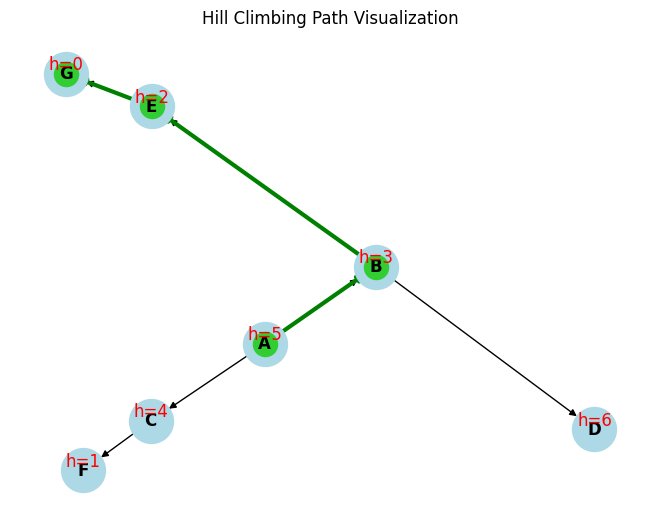

In [25]:
G = nx.from_pandas_edgelist(edges, "from", "to", create_using=nx.DiGraph())
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1000, font_weight="bold")
nx.draw_networkx_labels(G, pos, labels={n: f"h={heuristic[n]}" for n in G}, font_color="red", verticalalignment="bottom")
nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color="green", width=3)
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="limegreen")

print("Goal reached!" if path[-1] == goal else "Failed to reach the goal.")
print("Path taken:", path)

plt.title("Hill Climbing Path Visualization")
plt.show()

